<h1>Tabla de contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span><ul class="toc-item"><li><span><a href="#Objetivos-del-proyecto" data-toc-modified-id="Objetivos-del-proyecto-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objetivos del proyecto</a></span></li></ul></li><li><span><a href="#Abre-el-archivo-de-datos-y-mira-la-información-general." data-toc-modified-id="Abre-el-archivo-de-datos-y-mira-la-información-general.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Abre el archivo de datos y mira la información general.</a></span></li><li><span><a href="#Ejercicio-1.-Exploración-de-datos" data-toc-modified-id="Ejercicio-1.-Exploración-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ejercicio 1. Exploración de datos</a></span></li><li><span><a href="#Transformación-de-datos" data-toc-modified-id="Transformación-de-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transformación de datos</a></span><ul class="toc-item"><li><span><a href="#Restaurar-valores-ausentes-en-total_income" data-toc-modified-id="Restaurar-valores-ausentes-en-total_income-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Restaurar valores ausentes en <code>total_income</code></a></span></li><li><span><a href="#Restaurar-valores-ausentes-en-days_employed" data-toc-modified-id="Restaurar-valores-ausentes-en-days_employed-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Restaurar valores ausentes en <code>days_employed</code></a></span></li></ul></li><li><span><a href="#Clasificación-de-datos" data-toc-modified-id="Clasificación-de-datos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clasificación de datos</a></span></li><li><span><a href="#Comprobación-de-las-hipótesis" data-toc-modified-id="Comprobación-de-las-hipótesis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comprobación de las hipótesis</a></span></li></ul></div>

## Introducción

Este proyecto consiste en preparar un informe par la división de préstamos de un banco. Deberemos averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el cumplimiento o incumplimiento del pago de un préstamo. Para hacer esto, tendremos que crear y asignar una puntuación de crédito para un cliente potencial. Se utilizará esta puntuación de crédito para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes. Por lo que comenzaremos procesando y reparando estos datos. Una vez tengamos un conjunto de datos completo y confiable, los podremos analizar y obtener las conclusiones que necesitamos.

### Objetivos del proyecto

1. Averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el cumplimiento o incumplimiento del pago de un préstamo.
2. Crear y asignar una puntuación de crédito para un cliente potencial.

## Abre el archivo de datos y mira la información general. 


In [102]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [103]:
# Carga los datos
try:
    df = pd.read_csv('credit_scoring_eng.csv')
#except:
 #   df = pd.read_csv('C:/Users/tomas/OneDrive/Documentos/credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv') 
    
df_natural = df

## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo



In [104]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos
print('Columnas:', df.shape[1])
print('Filas:', len(df))


Columnas: 12
Filas: 21525


In [105]:
# vamos a mostrar las primeras filas N
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Veo varios posibles errores para nuestros datos:
- `days_employed`: veo valores negativos y decimales, me gustaría preguntar la razón a quien me haya dado la tabla
- `education`: probablemente tendremos varias formas diferentes de escribir los mismos datos, habrá que limpiar y reemplazar en esta lista
- `family_status`: podriamos llegar a tener el mismo problema que con `education`
- `debt`: según la descripción de datos, tal vez sería mejor tener un `str` o un valor booleano en esta columna, pero no debería ser problema
- `purpose`: probablemente hay muchos motivos diferentes, será dificil analizar esta columna, pero se podrían llegar a agrupar en categorias generales

In [106]:
# Obtener información sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB



Hay valores ausentes en las columnas `days_employed` y `total_income`. Como son la misma cantidad, tal vez los valores falten en ambas columnas simultaneamente en cada fila.

In [107]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
df_empty = df[df['days_employed'].isna()==True]
df_empty.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing



Los valores parecen simétricos, pero no podemos estar seguros. En el siguiente cuadro haremos un análisis más profundo para verificarlo.
Aquí dejaré la información de la tabla anterior para poder compararla con la siguiente.

In [108]:
df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


In [109]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.

df_empty_2 = df[(df['days_employed'].isna()==True) & (df['total_income'].isna()==True)]
df_empty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


**Conclusión intermedia**

Los valores calzan completamente, ahora si podemos concluir que cuando falte un valor en una fila, tambien faltará el otro.

Tenemos un 10% de filas con los datos faltantes, esto es suficiente para alterar nuetras mediciones y debemos resolverlo antes de comenzar con el análisis.

Debemos resolver el problema de los valores ausentes. Primero revisaremos las otras columnas para ver si existe alguna correlación o causa para la falta de datos. Analizaremos los datos para ver si los datos faltantes se deben a algun factor especifico que podamos descubrir. 

Luego, si existe alguna información que nos pueda ayudar a entender los valores vacíos, también nos podría ayudar a llenarlos.

In [110]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes

df_empty.groupby('education_id')['education_id'].count() 
# Encontramos que una gran mayoría de estas personas tiene el mismo nivel educacional

education_id
0     544
1    1540
2      69
3      21
Name: education_id, dtype: int64

In [111]:
df_empty['education_id'].value_counts(normalize=True)

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64

In [112]:
df['education_id'].value_counts(normalize=True)

1    0.707689
0    0.244367
2    0.034564
3    0.013101
4    0.000279
Name: education_id, dtype: float64

[[<AxesSubplot:title={'center':'education_id'}>]]


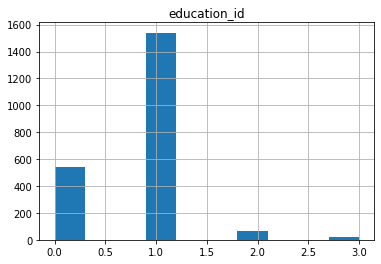

In [113]:
# Comprobación de la distribución

print(df_empty.hist('education_id')) # No entiendo bien que se refieren con comprobar la distribución


**Posibles razones por las que hay valores ausentes en los datos**

Las razones más probables que se me ocurren son 3:
1. Estas personas no tienen actualmente un trabajo y en vez de poner el valor 0, dejaron el valor vacío
2. Estas personas tienen actualmente un trabajo, pero este no es con contrato y/o no tiene un sueldo fijo
3. Hay un error en los datos, ya sea por como se obtuvieron, guardaron o entregaron.

No creo que los valores vacíos sean al azar, pues siempre faltan ambos valores en las filas con valores vacíos. Entonces, estos deben seguir algún patrón. Por lo que puedo estimar, pueden ser cualquiera de las 3 razones propuestas anteriormente.

education_id
0     5260
1    15233
2      744
3      282
4        6
Name: education_id, dtype: int64


array([[<AxesSubplot:title={'center':'education_id'}>]], dtype=object)

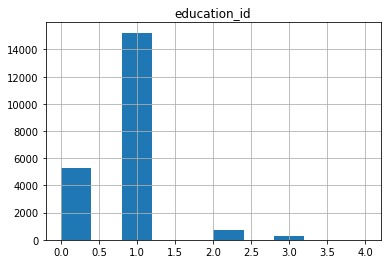

In [114]:
# Comprobando la distribución en el conjunto de datos entero
print(df.groupby('education_id')['education_id'].count())
df.hist('education_id')

**Conclusión intermedia**

Ambos grupos de datos tienen la misma distribución. De hecho a diferencia de un orden de magnitud, ambos histogramas tienen casi exactamente la misma estructura.Por ejemplo un 70% de personas tienen un bachelor's degree (id = 1).

Significa que se hace dificil encontrar una única razon por la que se de esta falta de información. 

Compararemos otras variables para asegurarnos que no existe algún patron que no hayamos notado.

In [115]:
# Comprueba otras razones y patrones que podrían llevar a valores ausentes
print('Tipos de trabajo en grupo con datos faltantes:')
print(df_empty.groupby('income_type')['income_type'].count())
print()
print()
print('Tipos de trabajo en grupo completo:')
print(df.groupby('income_type')['income_type'].count())

Tipos de trabajo en grupo con datos faltantes:
income_type
business          508
civil servant     147
employee         1105
entrepreneur        1
retiree           413
Name: income_type, dtype: int64


Tipos de trabajo en grupo completo:
income_type
business                        5085
civil servant                   1459
employee                       11119
entrepreneur                       2
paternity / maternity leave        1
retiree                         3856
student                            1
unemployed                         2
Name: income_type, dtype: int64


El hecho de que ninguna de estas personas haya marcado unemployed en la columna `income_type` me lleva a concluir que la razón 1 no es la correcta. Estas personas poseen algún trabajo.

Además, nuevamente se mantienen las mismas proporciones, lo que me hace pensar que la razón 3 gana posibilidades.

**Conclusión intermedia**

Al parecere los valores ausentes son accidentales, a continuación se verificarán algunas otras variables para asegurarnos de esto.

In [116]:
# Comprobación de otros patrones: Cantidad de niños
print('Cantidad de niños en grupo con datos faltantes:')
print(df_empty.groupby('children')['children'].count())
print()
print('Cantidad de niños en grupo completo:')
print(df.groupby('children')['children'].count())

Cantidad de niños en grupo con datos faltantes:
children
-1        3
 0     1439
 1      475
 2      204
 3       36
 4        7
 5        1
 20       9
Name: children, dtype: int64

Cantidad de niños en grupo completo:
children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64


In [117]:
# Comprobación de otros patrones: Cantidad de niños
print('Tipo de familia en grupo con datos faltantes:')
print(df_empty.groupby('family_status_id')['family_status_id'].count())
print()
print('Tipo de familia en grupo completo:')
print(df.groupby('family_status_id')['family_status_id'].count())

Tipo de familia en grupo con datos faltantes:
family_status_id
0    1237
1     442
2      95
3     112
4     288
Name: family_status_id, dtype: int64

Tipo de familia en grupo completo:
family_status_id
0    12380
1     4177
2      960
3     1195
4     2813
Name: family_status_id, dtype: int64


**Conclusiones**

Todas las filas con datos faltantes siguen el mismo patrón de distribución que los datos generales en todas las variables comparadas. Me parece que este es el patrón que buscabamos y que confirma que la falta de valores es accidental o aleatoria.

Como siempre se siguen los mismos patrones de dispersión entre las filas con valores faltantes y los datos generales, estudiaremos la media, la mediana y la dispersión de los datos para decidir con que valores llenar los datos vacíos. Probablemente usemos la media o la mediana, dependiendo de como se distribuyan los valores en estas tablas.

Las lineas duplicadas se eliminaran, mientras que las con datos faltantes se llenaran, evaluando los valores según edad y nivel de estudios. 
Ahora considerando los datos ingresados incorrectamente, deberemos estudiarlos antes de poder dar una repuesta. Si podemos arreglarlos, lo haremos. En caso contrario, deberemos decidir si eliminarlos es la opción correcta.

## Transformación de datos


In [118]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [119]:
# Arregla los registros si es necesario
df['education'] = df['education'].str.lower()

In [120]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido

df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [121]:
# Veamos la distribución de los valores en la columna `children`
df.groupby('children')['children'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

Tenemos 2 grupos problemáticos:
- Las persons con -1 hijos
- Las personas con 20 hijos

En conjunto, los valores problemáticos son el 0.5% de los datos totales. Al ser tan pocos, eliminarlos no afectará a la distribución total ni las conclusiones que sacaremos del análisis de datos, pero intentaremos mantenerlos y corregirlos.

In [122]:
# [arregla los datos según tu decisión]
# df = df[(df['children']!=20) & (df['children']!=-1)] # Solo mantendré el codigo a modo de referencia.
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)


In [123]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado
df.value_counts('children')


children
0    14149
1     4865
2     2131
3      330
4       41
5        9
dtype: int64

In [124]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

Tenemos más de un 75% de datos con errores.

In [125]:
# Aborda los valores problemáticos, si existen.
df['days_employed'] = abs(df['days_employed'])

In [126]:
# Comprueba el resultado - asegúrate de que esté arreglado
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

Ahora echemos un vistazo a la edad de clientes para ver si hay algún problema allí.

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64
Porcentaje: 0.4692218350754936 %


<AxesSubplot:>

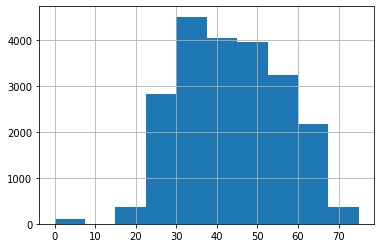

In [127]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
print(df['dob_years'].describe())
print('Porcentaje:', len(df[df['dob_years']==0])*100/len(df),'%')
df['dob_years'].hist()

Siendo un porcentaje tan bajo, eliminarlos no debería causarnos problemas con el análisis de las tendencias en los datos generales.

In [128]:
# Resuelve los problemas en la columna `dob_years`, si existen
df = df[df['dob_years']!=0]

Porcentaje: 0.0 %


<AxesSubplot:>

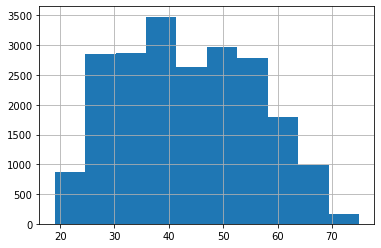

In [129]:
# Comprueba el resultado - asegúrate de que esté arreglado
print('Porcentaje:', len(df[df['dob_years']==0])*100/len(df),'%')
df['dob_years'].hist()

family_status
married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
dtype: int64


<AxesSubplot:>

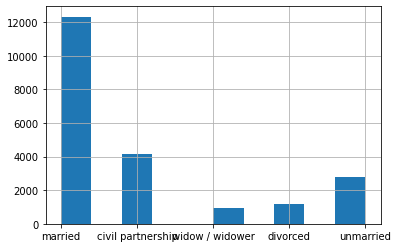

In [130]:
# Veamos los valores de la columna
print(df.value_counts('family_status'))
df['family_status'].hist()


In [131]:
# Aborda los valores problemáticos en `family_status`, si existen

# Todo parece estar bien con estos datos.
# No hay errores de tipeo, ni valores extraños.
# Aunque si sorprende la gran cantidad de personas casadas comparada a los otros grupos
# Pero es esperable por los gastos de una pareja casada, como casa, auto, niñes, negocios. etc.

In [132]:
# Comprueba el resultado - asegúrate de que esté arreglado

# Nada que comprobar, los datos siguen iguales.

Generos: ['F' 'M' 'XNA']
gender
F      14164
M       7259
XNA        1
dtype: int64


<AxesSubplot:>

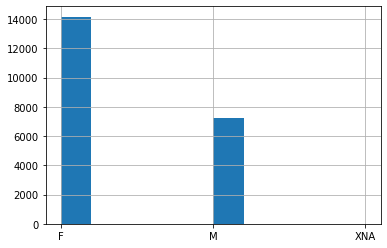

In [133]:
# Veamos los valores en la columna
print('Generos:',df['gender'].unique())
print(df.value_counts('gender'))

df['gender'].hist()

In [134]:
# Aborda los valores problemáticos, si existen

# Aunque si salta a la vista que una sola persona tiene un genero fuera del binario y resulta por lo tanto un valor anormal para la norma
# No creo necesario cambiar esta línea considerando a las personas con un genero disidente o no binario.

In [135]:
# Comprueba el resultado - asegúrate de que esté arreglado

# Nuevamente los datos permanecen iguales, nada que cambiar.

income_type
employee                       11064
business                        5065
retiree                         3836
civil servant                   1453
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
dtype: int64


<AxesSubplot:>

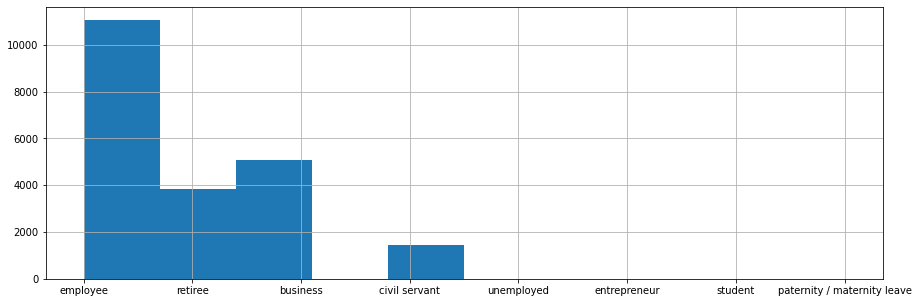

In [136]:
# Veamos los valores en la columna
print(df.value_counts('income_type'))

df['income_type'].hist(figsize=(15,5))

In [137]:
# Aborda los valores problemáticos, si existen

# Aunque existen 4 grupos con muy pocos participantes, no creo necesario alterar los datos para eliminarlos.
# Son pocas personas, pues estos grupos tienen, probablemente, menos posibilidades de tener aceptado su prestamo.
# Considerando que tal vez no tienen una entrada estable de dinero.
# Por esto, no se cambiaran, pues aportan información a los datos generales y se entiende que sean pocos.

In [138]:
# Comprueba el resultado - asegúrate de que esté arreglado

# Nuevamente, nada que cambiar en los datos.

In [139]:
# Comprobar los duplicados

df.duplicated().sum()

71

In [140]:
# Aborda los duplicados, si existen

df = df.drop_duplicates().reset_index()

In [141]:
# Última comprobación para ver si tenemos duplicados
df.duplicated().sum()

0

In [142]:
# Comprueba el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones
len(df)

21353


Hemos identificado todos los datos que nos llevarían a conclusiones equivocadas al estudiar los datos. Entre estos problemas, hemos eliminado duplicados y revisado cada columna corregiendo valores extraños y eliminando los desconocidos.

Considerando todo esto, hemos perdido un porcentaje minimo de datos y los que tenemos son mucho más confiables que los originales. 


In [143]:
print('Porcentaje de datos perdido:', 100-(len(df))*100/len(df_natural), '%')

Porcentaje de datos perdido: 0.7990708478513397 %


# Trabajar con valores ausentes

Aunque puede ser un poco confuso ver las IDs de los datos y no los datos, nuestro trabajo debe analizar tendencias y no debemos entender el caso a caso. Por ejemplo, necesitamos ver como se relaciona el pago de las deudas con el nivel educacional, independiente de que nivel educacional sea.

Es por esto que creo que no es necesario reemplazar las IDs por su significado, además, tenerlas como `int` nos permite realizar más operaciones en estas.

De todas formas, tener el significado de cada clave nos podría llegar a ayudar, por lo que se dejará aquí.

In [144]:
df_ref_ed = df[['education','education_id']]
df_ref_ed = df_ref_ed.drop_duplicates().reset_index(drop=True)

print(df_ref_ed.sort_values(by = 'education_id'))

             education  education_id
0    bachelor's degree             0
1  secondary education             1
2         some college             2
3    primary education             3
4      graduate degree             4


In [145]:
df_ref_fam = df[['family_status','family_status_id']]
df_ref_fam = df_ref_fam.drop_duplicates().reset_index(drop=True)

print(df_ref_fam.sort_values(by = 'family_status_id'))

       family_status  family_status_id
0            married                 0
1  civil partnership                 1
2    widow / widower                 2
3           divorced                 3
4          unmarried                 4


In [146]:
# Encuentra los diccionarios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21353 non-null  int64  
 1   children          21353 non-null  int64  
 2   days_employed     19260 non-null  float64
 3   dob_years         21353 non-null  int64  
 4   education         21353 non-null  object 
 5   education_id      21353 non-null  int64  
 6   family_status     21353 non-null  object 
 7   family_status_id  21353 non-null  int64  
 8   gender            21353 non-null  object 
 9   income_type       21353 non-null  object 
 10  debt              21353 non-null  int64  
 11  total_income      19260 non-null  float64
 12  purpose           21353 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


### Restaurar valores ausentes en `total_income`


Tenemos la columna `total_income` y `days_employed` con valores ausentes. Para esto veremos como se comparan la media y la mediana según la edad, tipo de ingreso y la cantidad de ingresos de todas las filas con todos los valores. Con esta nueva información podremos llenar los espacios vacíos en nuestro dataframe.

Considerando que el menor tiene 19 años y el mayor tiene 75. Esto nos deja un rango de 56 años, que dividiremos en espacios de 7 años.

In [147]:
# Vamos a escribir una función que calcule la categoría de edad
def cat_age (values):
    a = []
    for value in values:
        if float(value)<26:
            a.append('19-25')
        elif 26<=float(value)<33:
            a.append('26-32')
        elif 33<=float(value)<40:
            a.append('33-39')
        elif 40<=float(value)<47:
            a.append('40-46')
        elif 47<=float(value)<54:
            a.append('47-53')
        elif 54<=float(value)<61:
            a.append('54-60')
        elif 61<=float(value)<68:
            a.append('61-67')
        elif 68<=float(value)<=75:
            a.append('68-75')
        else:
            a.append('error')
    return a

In [148]:
# Prueba si la función funciona bien
print(cat_age([34]))
print(cat_age(df['dob_years']))

['33-39']
['40-46', '33-39', '33-39', '26-32', '47-53', '26-32', '40-46', '47-53', '33-39', '40-46', '33-39', '40-46', '61-67', '54-60', '54-60', '26-32', '33-39', '33-39', '47-53', '47-53', '33-39', '33-39', '19-25', '19-25', '54-60', '61-67', '40-46', '26-32', '26-32', '61-67', '61-67', '47-53', '33-39', '47-53', '33-39', '68-75', '33-39', '40-46', '19-25', '26-32', '26-32', '47-53', '19-25', '40-46', '26-32', '47-53', '33-39', '33-39', '40-46', '54-60', '61-67', '47-53', '26-32', '61-67', '26-32', '54-60', '61-67', '40-46', '33-39', '47-53', '47-53', '40-46', '47-53', '40-46', '33-39', '19-25', '26-32', '47-53', '40-46', '19-25', '26-32', '61-67', '26-32', '40-46', '40-46', '33-39', '40-46', '40-46', '61-67', '26-32', '19-25', '33-39', '47-53', '47-53', '47-53', '26-32', '61-67', '47-53', '61-67', '40-46', '33-39', '33-39', '40-46', '26-32', '33-39', '47-53', '40-46', '47-53', '54-60', '47-53', '61-67', '47-53', '33-39', '54-60', '61-67', '26-32', '19-25', '33-39', '54-60', '40-46',

In [149]:
# Crear una nueva columna basada en la función
df['cat_age'] = cat_age(df['dob_years'])


In [150]:
# Comprobar cómo los valores en la nueva columna

df.head()

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_age
0,0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-46
1,1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,33-39
2,2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,33-39
3,3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-32
4,4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,47-53


In [151]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien
df_full = df.dropna()
df_full.head(10)

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_age
0,0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-46
1,1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,33-39
2,2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,33-39
3,3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-32
4,4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,47-53
5,5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,26-32
6,6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,40-46
7,7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,47-53
8,8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,33-39
9,9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,40-46


In [152]:
# Examina los valores medios de los ingresos en función de los factores que identificaste
df_full.pivot_table(index='cat_age', values='total_income', aggfunc='mean')
# [Consejo] Esto quedaría mejor dicho como el valor promedio

,total_income
cat_age,
19-25,23456.041111
26-32,27083.822535
33-39,28681.289008
40-46,28806.955562
47-53,27317.070146
54-60,24823.867419
61-67,23674.467624
68-75,20092.058355


In [153]:
# Examina los valores medianos de los ingresos en función de los factores que identificaste
df_full.pivot_table(index='cat_age', values='total_income', aggfunc='median')

,total_income
cat_age,
19-25,21425.9640
26-32,23796.6030
33-39,24902.4190
40-46,24755.6960
47-53,23694.0165
54-60,21638.5550
61-67,20177.9970
68-75,18004.9405


In [154]:
df_full.groupby('cat_age')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
cat_age,,,,,,,,
19-25,1113.0,23456.041111,11365.713431,5220.544,15720.41800,21425.9640,28286.62200,105400.683
26-32,3221.0,27083.822535,14921.518821,4494.861,17059.80000,23796.6030,32998.15800,159522.288
33-39,3659.0,28681.289008,18159.253952,3392.845,17702.60300,24902.4190,34770.09300,352136.354
40-46,3463.0,28806.955562,18951.631121,4036.463,17750.76000,24755.6960,34722.16050,362496.645
47-53,3078.0,27317.070146,16233.043814,3418.824,16591.66075,23694.0165,33964.54525,195686.797
54-60,2809.0,24823.867419,14455.192053,3306.762,15355.05600,21638.5550,30638.07800,180613.801
61-67,1587.0,23674.467624,16051.629882,3503.298,13826.11750,20177.9970,28835.68600,274402.943
68-75,330.0,20092.058355,11191.968090,3471.216,12464.70450,18004.9405,25203.03325,92991.934


Se elige por tomar la mediana y no la media para rellenar los valores, pues estos estan distribuidos de manera asimetricas y esto puede deberse a la existencia de datos atipicos.

In [155]:
#  Escribe una función que usaremos para completar los valores ausentes
data_fill_income = df_full.pivot_table(index=['education','cat_age'], columns='income_type', values='total_income', aggfunc='median')
def fill_nan_total_income(age, income_type, education):
    try:
        return data_fill_income[income_type][education][age]
    except:
        return 'error'
    

In [156]:
# Comprueba si funciona
df_income_prom = df.apply(lambda row: fill_nan_total_income(row['cat_age'], row['income_type'], row['education']), axis=1)
df_income_prom.head(10)

0    27457.8260
1    22342.0250
2    22342.0250
3    21016.8230
4    19022.3005
5    31398.8645
6    34859.5630
7    21642.5510
8    27392.4070
9    22361.2790
dtype: float64

In [157]:
# Aplícalo a cada fila
df['total_income'] = df['total_income'].fillna(df_income_prom)

In [158]:
# Comprueba si tenemos algún error
df[df['total_income'].isna() == True]

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_age
3870,3891,1,NaN,68,some college,2,divorced,3,F,employee,0,NaN,building a property,68-75
5907,5936,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate,54-60
8095,8142,0,NaN,64,primary education,3,civil partnership,1,F,civil servant,0,NaN,to have a wedding,61-67


Para rellenar estos datos contamos con 3 fuentes de información: `income_type`, `education` y `cat_age`
    
El problema es que, sea por separado o de manera independiente, obtenemos valores de media y mediana muy diferentes.

Para resolver esto, tomaremos la mediana de cada caracteristica y luego el promedio de estos valores. Ese resultado pondremos en el lugar del valor vacío.

In [159]:
def prom_missing_esp (income_type, education, cat_age):
    df_income = df[(df['income_type']==income_type)]['total_income'].median()
    df_education = df[(df['education']==education)]['total_income'].median()
    df_cat_age = df[(df['cat_age']==cat_age)]['total_income'].median()
    valores = np.array([df_income, df_education, df_cat_age])
    valores = pd.Series(valores).dropna()
    return (sum(valores))/len(valores)

In [160]:
# Reemplazar los valores ausentes si hay algún error
df_fill_esp = np.array([prom_missing_esp('employee', 'some college', '68-75'), prom_missing_esp('entrepeneur', "bachelor's degree", '54-60'), prom_missing_esp('civil servant', 'primary education', '61-67')])
df_fill_esp = pd.Series(df_fill_esp)
df_fill_esp.index = pd.Series([3870, 5907, 8095])
df['total_income'] = df['total_income'].fillna(df_fill_esp)

In [161]:
# Comprobar el número de entradas en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21353 non-null  int64  
 1   children          21353 non-null  int64  
 2   days_employed     19260 non-null  float64
 3   dob_years         21353 non-null  int64  
 4   education         21353 non-null  object 
 5   education_id      21353 non-null  int64  
 6   family_status     21353 non-null  object 
 7   family_status_id  21353 non-null  int64  
 8   gender            21353 non-null  object 
 9   income_type       21353 non-null  object 
 10  debt              21353 non-null  int64  
 11  total_income      21353 non-null  float64
 12  purpose           21353 non-null  object 
 13  cat_age           21353 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.3+ MB


###  Restaurar valores ausentes en `days_employed`

In [162]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados

data_fill_days = df_full.pivot_table(index=['education','cat_age'], columns='income_type', values='days_employed', aggfunc='median')
data_fill_days.head(10)

income_type                    business  civil servant     employee  \
education         cat_age                                             
bachelor's degree 19-25      749.391880    1189.077092   679.768622   
                  26-32     1103.291571    1728.914992  1293.919177   
                  33-39     1480.955194    3091.875794  1556.353586   
                  40-46     1881.114369    3652.827228  1992.395586   
                  47-53     1899.135918    4234.340334  2015.058063   
                  54-60     2265.592454    4177.551655  2575.977550   
                  61-67     2350.897005    4028.109979  3000.270035   
                  68-75    10093.858479    5081.419068  3320.715141   
graduate degree   33-39             NaN    5968.075884  2351.431934   
                  40-46             NaN            NaN   409.200149   

income_type                entrepreneur  paternity / maternity leave  \
education         cat_age                                              
bachelor's degree 19-25             NaN                          NaN   
                  26-32      520.848083                          NaN   
                  33-39             NaN                          NaN   
                  40-46             NaN                          NaN   
                  47-53             NaN                          NaN   
                  54-60             NaN                          NaN   
                  61-67             NaN                          NaN   
                  68-75             NaN                          NaN   
graduate degree   33-39             NaN                          NaN   
                  40-46             NaN                          NaN   

income_type                      retiree     student     unemployed  
education         cat_age                                            
bachelor's degree 19-25              NaN  578.751554            NaN  
                  26-32    389397.167577         NaN            NaN  
                  33-39    383832.244324         NaN            NaN  
                  40-46    353842.669857         NaN  395302.838654  
                  47-53    359808.877082         NaN            NaN  
                  54-60    365574.560175         NaN            NaN  
                  61-67    367857.806545         NaN            NaN  
                  68-75    368893.220123         NaN            NaN  
graduate degree   33-39              NaN         NaN            NaN  
                  40-46              NaN         NaN            NaN

In [163]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
df_full.pivot_table(index=['education','cat_age'], columns='income_type', values='days_employed', aggfunc='mean')

income_type                      business  civil servant     employee  \
education           cat_age                                             
bachelor's degree   19-25      914.240608    1287.416562   836.435145   
                    26-32     1392.685107    1834.112507  1516.302787   
                    33-39     1894.166166    3170.443936  2169.285458   
                    40-46     2282.604049    3945.777064  2753.776240   
                    47-53     2669.540751    4268.090690  2930.712323   
                    54-60     2752.084180    4533.747825  3709.776787   
                    61-67     3845.510534    5326.754822  4101.801223   
                    68-75    10877.583207    5081.419068  3320.715141   
graduate degree     33-39             NaN    5968.075884  2351.431934   
                    40-46             NaN            NaN   409.200149   
                    54-60             NaN            NaN  5352.038180   
                    61-67             NaN            NaN          NaN   
                    68-75             NaN            NaN          NaN   
primary education   19-25     1180.618510            NaN   771.487975   
                    26-32      788.803612     760.901517  1606.314778   
                    33-39     2007.919177    1672.633661  1787.352803   
                    40-46     2074.871517            NaN  1731.209871   
                    47-53     8366.176768    4193.718465  2093.595098   
                    54-60      674.706981    6301.550657  2221.985195   
                    61-67             NaN            NaN  3746.319820   
                    68-75             NaN            NaN  5159.125702   
secondary education 19-25      847.376020    1248.295551   971.965380   
                    26-32     1512.967377    2110.716844  1521.213181   
                    33-39     2044.837764    2922.602032  2163.331315   
                    40-46     2351.474149    3874.967615  2592.769009   
                    47-53     2818.287155    4484.178291  3070.035368   
                    54-60     3088.954417    5433.139276  3281.078242   
                    61-67     3425.585257    3806.861470  3789.616642   
                    68-75     3091.285431    2692.902159  3841.229788   
some college        19-25      809.803769     833.238083   889.582603   
                    26-32     1207.825400    2214.095278  1376.398688   
                    33-39     1570.051075    2685.604120  1557.479893   
                    40-46     2459.366460    5203.178634  2344.362832   
                    47-53     2298.828909    1643.155616  2306.880137   
                    54-60     1227.682256            NaN  3282.182544   
                    61-67      927.335994            NaN  4823.073458   
                    68-75             NaN            NaN          NaN   

income_type                  entrepreneur  paternity / maternity leave  \
education           cat_age                                              
bachelor's degree   19-25             NaN                          NaN   
                    26-32      520.848083                          NaN   
                    33-39             NaN                          NaN   
                    40-46             NaN                          NaN   
                    47-53             NaN                          NaN   
                    54-60             NaN                          NaN   
                    61-67             NaN                          NaN   
                    68-75             NaN                          NaN   
graduate degree     33-39             NaN                          NaN   
                    40-46             NaN                          NaN   
                    54-60             NaN                          NaN   
                    61-67             NaN                          NaN   
                    68-75             NaN                          NaN   
primary education   19-25             NaN 


Bajo la misma conclusión en `total_income`, utilizaremos las medianas, pues los valores no son simétricos.

In [164]:
# Escribamos una función que calcule medias o medianas (dependiendo de tu decisión) según el parámetro identificado
def fill_nan_total_days(age, income_type, education):
    try:
        return data_fill_days[income_type][education][age]
    except:
        return 'error'

In [165]:
# Comprueba que la función funciona
df_days_prom = df.apply(lambda row: fill_nan_total_income(row['cat_age'], row['income_type'], row['education']), axis=1)
df_days_prom.head(10)


0    27457.8260
1    22342.0250
2    22342.0250
3    21016.8230
4    19022.3005
5    31398.8645
6    34859.5630
7    21642.5510
8    27392.4070
9    22361.2790
dtype: float64

In [166]:
# Aplicar la función al income_type
df['days_employed'] = df['days_employed'].fillna(df_days_prom)

In [167]:
# Comprueba si la función funcionó
df[df['days_employed'].isna() == True]


,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_age
3870,3891,1,NaN,68,some college,2,divorced,3,F,employee,0,21917.274333,building a property,68-75
5907,5936,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,24786.296750,buy residential real estate,54-60
8095,8142,0,NaN,64,primary education,3,civil partnership,1,F,civil servant,0,20686.096833,to have a wedding,61-67


In [168]:
def prom_missing_esp_days (income_type, education, cat_age):
    df_income = df[(df['income_type']==income_type)]['days_employed'].median()
    df_education = df[(df['education']==education)]['days_employed'].median()
    df_cat_age = df[(df['cat_age']==cat_age)]['days_employed'].median()
    valores = np.array([df_income, df_education, df_cat_age])
    valores = pd.Series(valores).dropna()
    return (sum(valores))/len(valores)

In [169]:
# Reemplazar valores ausentes
df_fill_esp = np.array([prom_missing_esp('employee', 'some college', '68-75'), prom_missing_esp('entrepeneur', "bachelor's degree", '54-60'), prom_missing_esp('civil servant', 'primary education', '61-67')])
df_fill_esp = pd.Series(df_fill_esp)
df_fill_esp.index = pd.Series([3870, 5907, 8095])
df['days_employed'] = df['days_employed'].fillna(df_fill_esp)


In [170]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21353 non-null  int64  
 1   children          21353 non-null  int64  
 2   days_employed     21353 non-null  float64
 3   dob_years         21353 non-null  int64  
 4   education         21353 non-null  object 
 5   education_id      21353 non-null  int64  
 6   family_status     21353 non-null  object 
 7   family_status_id  21353 non-null  int64  
 8   gender            21353 non-null  object 
 9   income_type       21353 non-null  object 
 10  debt              21353 non-null  int64  
 11  total_income      21353 non-null  float64
 12  purpose           21353 non-null  object 
 13  cat_age           21353 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.3+ MB


## Clasificación de datos

En pos de la eficiencia, comenzaré a comparar y analizar los datos directamente. Sin dividirlos en 2 secciones, textuales y númericas. Para esto comenzaremos aislando las columnas que necesitamos.

In [171]:
# Muestra los valores de los datos seleccionados para la clasificación

df_selec = df.loc[:,['children', 'family_status', 'family_status_id', 'debt', 'total_income', 'purpose']]
df_selec.head(10)

,children,family_status,family_status_id,debt,total_income,purpose
0,1,married,0,0,40620.102,purchase of the house
1,1,married,0,0,17932.802,car purchase
2,0,married,0,0,23341.752,purchase of the house
3,3,married,0,0,42820.568,supplementary education
4,0,civil partnership,1,0,25378.572,to have a wedding
5,0,civil partnership,1,0,40922.170,purchase of the house
6,0,married,0,0,38484.156,housing transactions
7,0,married,0,0,21731.829,education
8,2,civil partnership,1,0,15337.093,having a wedding
9,0,married,0,0,23108.150,purchase of the house for my family


Comprobaremos cada columna y veremos los valores únicos y su distribución al mismo tiempo.

array([[<AxesSubplot:title={'center':'family_status_id'}>]], dtype=object)

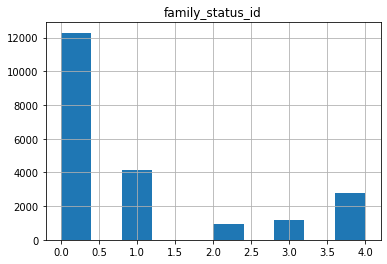

In [172]:
df_selec.hist('family_status_id')

In [173]:
print(df_ref_fam.sort_values(by = 'family_status_id'))

       family_status  family_status_id
0            married                 0
1  civil partnership                 1
2    widow / widower                 2
3           divorced                 3
4          unmarried                 4


array([[<AxesSubplot:title={'center':'children'}>]], dtype=object)

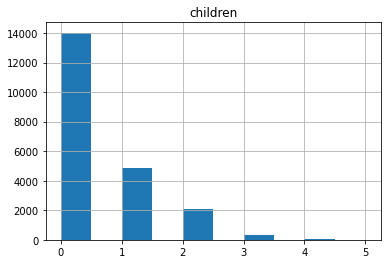

In [174]:
df_selec.hist('children')

In [175]:
df_selec['total_income'].describe()
# Esta columna tiene demasiados valores únicos, por lo que en vez de eso, buscamos una rápida explicación estadística con el metodo `describe()`

count     21353.000000
mean      26487.332617
std       15750.249682
min        3306.762000
25%       17188.946000
50%       22928.453000
75%       31610.498000
max      362496.645000
Name: total_income, dtype: float64

array([[<AxesSubplot:title={'center':'debt'}>]], dtype=object)

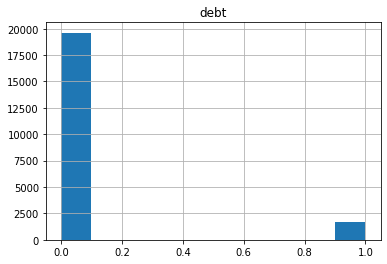

In [176]:
df_selec.hist('debt')

Considerar que el valor 1 significa que el cliente ha incumplido alguna vez un préstamo


Puedo ver que la mayoría de las tienden a caer en ciertas categorías. Por ejemplo, estos datos me dicen que habrá un gran número de personas casadas, sin hijos y con un historial de préstamo limpio.

Además de esto, tenemos la columna `purpose` que reorganizaremos paraa tener una mejor idea de las razones para los préstamos.

In [177]:
df_selec['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [178]:
# Escribamos una función para clasificar los datos en función de temas comunes

def sust_proposito(valor):
    if 'car' in valor:
        return 'car'
    elif 'house' in valor:
        return 'real estate'
    elif 'real estate' in valor:
        return 'real estate'
    elif 'educat' in valor: 
    # Usamos la parte de la palabra que es comun a todas sus formas (Ej: education, educated)
        return 'education'
    elif 'property' in valor:
        return 'real estate'
    elif 'housing' in valor:
        return 'real estate'
    elif 'wedding' in valor:
        return 'wedding'
    elif 'university' in valor:
        return 'education'
    else:
        return valor 
    # Terminar así nos sirve para revisar si es que existen terminos fuera de los puestos y no eliminarlos


In [179]:
# Aplicamos la función
df_selec['purpose'] = df_selec['purpose'].apply(sust_proposito)

In [180]:
df_selec['purpose'].unique()

array(['real estate', 'car', 'education', 'wedding'], dtype=object)

In [181]:
df_selec['purpose'].value_counts(normalize=True)

real estate    0.504098
car            0.200628
education      0.187093
wedding        0.108182
Name: purpose, dtype: float64

In [182]:
# Finalmente, agreguemos esta lista limpiada a nuestro Dataframe
# Para no alterar las columnas originales y perder información, se agregarán como una nueva columna `purpose_id`
df['purpose_id'] = df_selec['purpose']

In [183]:
# Crea una tabla con las categorías y cuenta los valores en ellas
df_selec.pivot_table(index=['family_status','children'], columns='purpose', values='debt', aggfunc='count')

# Esta tabla muestra la cantidad total de casos para cada categoría.

purpose                        car  education  real estate  wedding
family_status     children                                         
civil partnership 0          281.0      269.0        648.0   1519.0
                  1          107.0       97.0        259.0    531.0
                  2           37.0       31.0         61.0    224.0
                  3            5.0        6.0         13.0     32.0
                  4            1.0        NaN          4.0      3.0
                  5            1.0        NaN          NaN      1.0
divorced          0          192.0      158.0        427.0      NaN
                  1           70.0       61.0        184.0      NaN
                  2           14.0       18.0         49.0      NaN
                  3            1.0        NaN         10.0      NaN
                  4            1.0        NaN          NaN      NaN
married           0         1644.0     1573.0       4220.0      NaN
                  1          686.0      597.0       1714.0      NaN
                  2          335.0      350.0        888.0      NaN
                  3           50.0       58.0        139.0      NaN
                  4            8.0        6.0         15.0      NaN
                  5            1.0        1.0          5.0      NaN
unmarried         0          516.0      453.0       1280.0      NaN
                  1           93.0      102.0        257.0      NaN
                  2           21.0       15.0         47.0      NaN
                  3            4.0        2.0          2.0      NaN
                  4            NaN        1.0          1.0      NaN
widow / widower   0          199.0      174.0        469.0      NaN
                  1           11.0       18.0         52.0      NaN
                  2            6.0        2.0         16.0      NaN
                  3            NaN        3.0          3.0      NaN
                  4            NaN        NaN          1.0      NaN

In [184]:
df_selec.pivot_table(index=['family_status','children'], columns='purpose', values='debt', aggfunc='sum')

# Esta tabla muestra la cantidad de casos con préstamos impagos por categoría

purpose                       car  education  real estate  wedding
family_status     children                                        
civil partnership 0          28.0       35.0         51.0    113.0
                  1          17.0       18.0         32.0     51.0
                  2           4.0        6.0          8.0     15.0
                  3           2.0        1.0          0.0      5.0
                  4           0.0        NaN          0.0      0.0
                  5           0.0        NaN          NaN      0.0
divorced          0          13.0       13.0         29.0      NaN
                  1           6.0        2.0         13.0      NaN
                  2           2.0        2.0          4.0      NaN
                  3           0.0        NaN          1.0      NaN
                  4           0.0        NaN          NaN      NaN
married           0         119.0      118.0        277.0      NaN
                  1          66.0       57.0        122.0      NaN
                  2          38.0       38.0         72.0      NaN
                  3           3.0        3.0         11.0      NaN
                  4           1.0        0.0          2.0      NaN
                  5           0.0        0.0          0.0      NaN
unmarried         0          64.0       51.0         95.0      NaN
                  1          13.0       10.0         28.0      NaN
                  2           5.0        1.0          4.0      NaN
                  3           0.0        0.0          1.0      NaN
                  4           NaN        0.0          1.0      NaN
widow / widower   0          18.0       12.0         22.0      NaN
                  1           0.0        3.0          4.0      NaN
                  2           1.0        0.0          2.0      NaN
                  3           NaN        0.0          0.0      NaN
                  4           NaN        NaN          0.0      NaN

In [185]:
df_pay_prob = df_selec.pivot_table(index=['family_status','children'], columns='purpose', values='debt', aggfunc='mean')
df_pay_prob
# Esta tablaa muestra el porcentaje de préstamos impagos por categoría
# Considerando 1 = 100%

purpose                          car  education  real estate   wedding
family_status     children                                            
civil partnership 0         0.099644   0.130112     0.078704  0.074391
                  1         0.158879   0.185567     0.123552  0.096045
                  2         0.108108   0.193548     0.131148  0.066964
                  3         0.400000   0.166667     0.000000  0.156250
                  4         0.000000        NaN     0.000000  0.000000
                  5         0.000000        NaN          NaN  0.000000
divorced          0         0.067708   0.082278     0.067916       NaN
                  1         0.085714   0.032787     0.070652       NaN
                  2         0.142857   0.111111     0.081633       NaN
                  3         0.000000        NaN     0.100000       NaN
                  4         0.000000        NaN          NaN       NaN
married           0         0.072384   0.075016     0.065640       NaN
                  1         0.096210   0.095477     0.071179       NaN
                  2         0.113433   0.108571     0.081081       NaN
                  3         0.060000   0.051724     0.079137       NaN
                  4         0.125000   0.000000     0.133333       NaN
                  5         0.000000   0.000000     0.000000       NaN
unmarried         0         0.124031   0.112583     0.074219       NaN
                  1         0.139785   0.098039     0.108949       NaN
                  2         0.238095   0.066667     0.085106       NaN
                  3         0.000000   0.000000     0.500000       NaN
                  4              NaN   0.000000     1.000000       NaN
widow / widower   0         0.090452   0.068966     0.046908       NaN
                  1         0.000000   0.166667     0.076923       NaN
                  2         0.166667   0.000000     0.125000       NaN
                  3              NaN   0.000000     0.000000       NaN
                  4              NaN        NaN     0.000000       NaN

In [186]:
# Antes de decidir como categorizarlos, veamos como se distribuyen
df_pay_prob.describe()

purpose,car,education,real estate,wedding
count,24.000000,22.000000,25.000000,6.000000
mean,0.095374,0.079354,0.124043,0.065608
std,0.092090,0.064265,0.206015,0.059716
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.008197,0.065640,0.016741
50%,0.093331,0.078647,0.078704,0.070678
75%,0.128696,0.112215,0.108949,0.090632
max,0.400000,0.193548,1.000000,0.156250


In [187]:
df_selec.pivot_table(index='family_status', values='debt', aggfunc='mean')
# Aprovechemos a ver como se comporta cada variable por separado
# Comencemos con family_status

,debt
family_status,
civil partnership,0.093462
divorced,0.071730
married,0.075427
unmarried,0.097709
widow / widower,0.064990


In [188]:
df_selec.pivot_table(index='children', values='debt', aggfunc='mean')
# Children

,debt
children,
0,0.075453
1,0.091341
2,0.095553
3,0.082317
4,0.097561
5,0.000000


In [189]:
df_selec.pivot_table(index='purpose', values='debt', aggfunc='mean')
# Purpose

,debt
purpose,
car,0.093371
education,0.092616
real estate,0.072371
wedding,0.079654


Las medias y medianas de las columna son bastante cercanos en la mayoría de los casos, esto significa que tenemos distribuciones simétricas en 3 de 4 columnas. La columna `real_estate` no sigue esta regla, además tiene una desviación estándar mucho más alta que el resto. Un rápido estudio de las tablas nos permite ver que esta columna posee algunos valores fuera de la norma y otros marcadamente más altos que el resto.

Esto no cambiará las clasificaciones que diseñaremos, pero si muestran un patrón que se está formando. Veremos como evoluciona.

Para comenzar a clasificar la probabilidad de deber un prestamo (x), crearemos las siguientes categorías su riesgo:

- x=0: Seguro
- 0<x<=0.01: Muy bajo
- 0.01<x<=0.05: Bajo 
- 0.05<x<=0.10: Moderado
- 0.10<x<=0.50: Alto
- 0.50<x<1: Muy alto
- x=1: Peligro

Considerando el caso especial en que no tengamos datos como:
- Sin información

In [190]:
# Crear una función para clasificar en diferentes grupos numéricos basándose en rangos
def prob_counter(x):
    if x==0:
        return 'Seguro'
    elif 0<x<=0.01:
        return 'Muy bajo'
    elif 0.01<x<=0.05:
        return 'Bajo'
    elif 0.05<x<=0.075: 
        return 'Moderado bajo'
    elif 0.075<x<=0.10: 
        return 'Moderado alto'
    elif 0.10<x<=0.50: 
        return 'Alto'
    elif 0.50<x<1:
        return 'Muy alto'
    elif x==1: 
        return 'Peligro'
    else:
        return 'Sin información'

def fill_risk_cat(row):
    purpose = row['purpose']
    family_status = row['family_status']
    children = row['children']
    p = df_pay_prob[purpose][family_status][children]
    return prob_counter(p)
    



In [191]:
# Aplicamos la función
df['risk_cat'] = df_selec.apply(fill_risk_cat, axis=1)
df.head()

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_age,purpose_id,risk_cat
0,0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-46,real estate,Moderado bajo
1,1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,33-39,car,Moderado alto
2,2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,33-39,real estate,Moderado bajo
3,3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-32,education,Moderado bajo
4,4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,47-53,wedding,Moderado bajo


In [192]:
# Contar los valores de cada categoría para ver la distribución
df['risk_cat'].value_counts()

Moderado bajo    11701
Moderado alto     6030
Alto              3026
Bajo               530
Seguro              65
Peligro              1
Name: risk_cat, dtype: int64

## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [193]:
# Comprueba los datos sobre los hijos y los pagos puntuales
df_children = df.pivot_table(index='children', values='debt', aggfunc='mean')

# Calcular la tasa de incumplimiento en función del número de hijos
df_children
# La tasa se encuentra calculada al crear la pivot_table

,debt
children,
0,0.075453
1,0.091341
2,0.095553
3,0.082317
4,0.097561
5,0.000000


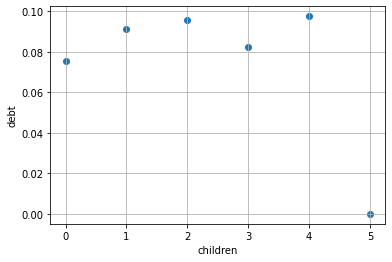

In [228]:
plt.scatter(df_children.index, df_children)
plt.grid()
plt.xlabel("children")
plt.ylabel("debt")
plt.show()

In [195]:
# Recordemos cual es la cantidad de hijos entre los clientes de nuestra base de datos
df['children'].value_counts()

0    14022
1     4839
2     2114
3      328
4       41
5        9
Name: children, dtype: int64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

Primero se me hace importante notar que tenemos considerablemente menos casos con 3 o más niños, que en el resto de los casos. Esto podría cambiar los resultados obtenidos.

Dicho esto, si parece existir una tendencia en que el riesgo aumenta con la cantidad de niños. Esta tendencia podría cambiar con una mayor cantidad de datos de personas con 3 o más niños, pues justamente en el caso de tener 3 niños, el riesgo disminuye. Este grupo podría ser caso de un siguiente estudio donde se indague en mayor profundidad.

Aunque la tendencia pueda cambiar, actualmente esta existe según estos datos y debería ser considerada al momento de realizar un préstamo.

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [196]:
# Comprueba los datos del estado familiar y los pagos a tiempo
df_family_status = df.pivot_table(index='family_status', values='debt', aggfunc='mean')



# Calcular la tasa de incumplimiento basada en el estado familiar
df_family_status
# La tasa se encuentra calculada al crear la pivot_table

,debt
family_status,
civil partnership,0.093462
divorced,0.071730
married,0.075427
unmarried,0.097709
widow / widower,0.064990


Ordenemos esta tabla y grafiquemosla para ver de mejor manera la información.

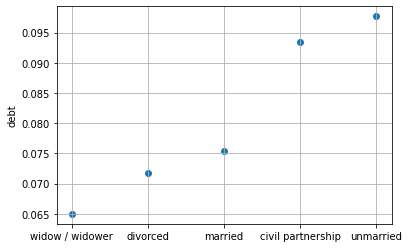

In [227]:
df_family_status = df_family_status.sort_values('debt')
plt.scatter(df_family_status.index, df_family_status)
plt.grid()
plt.ylabel("debt")
plt.show()

In [198]:
df['family_status'].value_counts()

married              12290
civil partnership     4130
unmarried             2794
divorced              1185
widow / widower        954
Name: family_status, dtype: int64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

Aquí podemos ver claramente como las personas solteras (no casadas) y con acuerdo civil son un riesgo mayor. Por otro lado, las personas divorciadas y viudas son los grupos con menor riesgo.

Este aspecto debe ser considerado al momento de realizar un préstamo, pues vemos claras tendencias dentro de esta característica.

Aunque también se hace importante notar que esta tendencia se encuentra dentro de un rango corto, poco más de 3% de diferencia entre el grupo menos riesgoso (viudos y viudas) y el grupo más riesgoso (solteros y solteras). Esta diferencia es pequeña, pero significativa.

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [199]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo
df_income_type = df.pivot_table(index='income_type', values='debt', aggfunc='mean')


# Calcular la tasa de incumplimiento basada en el nivel de ingresos
df_income_type.sort_values('debt')
# La tasa se encuentra calculada al crear la pivot_table

,debt
income_type,
entrepreneur,0.000000
student,0.000000
retiree,0.056445
civil servant,0.059269
business,0.074140
employee,0.095657
unemployed,0.500000
paternity / maternity leave,1.000000


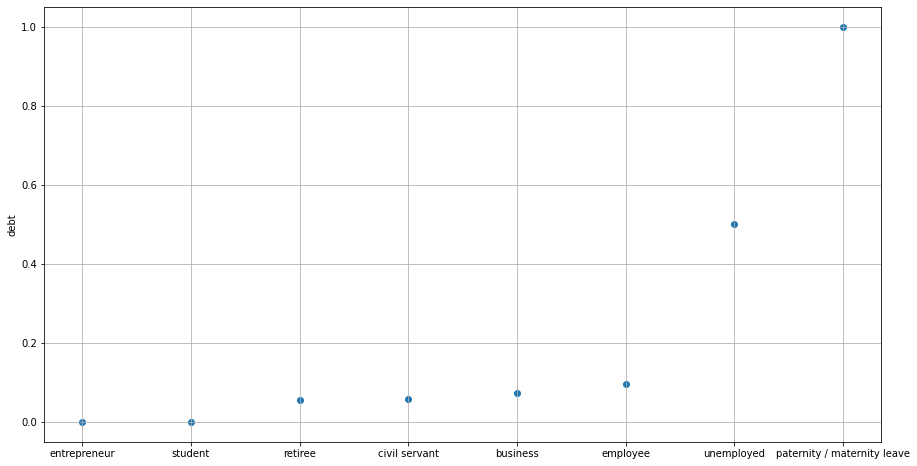

In [226]:
df_income_type = df_income_type.sort_values('debt')
plt.figure(figsize=(15,8))
plt.scatter(df_income_type.index, df_income_type)
plt.grid()
plt.ylabel("debt")
plt.show()

In [201]:
df['income_type'].value_counts()

employee                       11029
business                        5058
retiree                         3809
civil servant                   1451
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

**Conclusión**

Aunque viendo el gráfico podríamos llegar a una conclusión rápida y clara, también debemos considerar los datos de los que nace este gráfico. Los casos de `unemployed` y `paternity / maternity leave` suman 3 entre ambos de lo 21353 casos totales. Se ven más riesgosos, pero datos nuevos dentro de estas 2 categorías podrían cambiar rapidamente el resultado. Es por esto que no se pueden hacer conclusiones para estas dos categorías, ni para `student` y `entrepeneur`. Estos dos últimos se de muy bajo riesgo, pero nueva información también podría hacerlos cambiar rapidamente.

Se recomienda realizar préstamos con sumo cuidado para estos 4 grupos, sobre todo para los casos de `unemployed` y `paternity / maternity leave`. Estos podrían cambiar en el futuro, pero por ahora se encuentran dentro de la zona de alto riesgo.

Ahora podemos analizar los casos con una mayor cantidad de casos. Entre estos el más riesgoso resulta ser `employee` con casi 10% de riesgo frente a un préstamo. Por el otro lado, los casos de `retiree` y `civil servant` son los más seguros con riesgo entre 5% y 6%. Con `business` encontrandose en un punto medio con 7.5% de riesgo.


**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [202]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos
df_purpose = df.pivot_table(index='purpose_id', values='debt', aggfunc='mean')

df_purpose.sort_values('debt')


,debt
purpose_id,
real estate,0.072371
wedding,0.079654
education,0.092616
car,0.093371


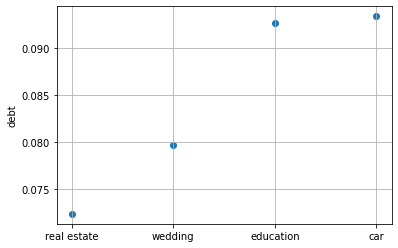

In [229]:
df_purpose = df_purpose.sort_values('debt')
plt.scatter(df_purpose.index, df_purpose)
plt.grid()
plt.ylabel("debt")
plt.show()

In [204]:
df['purpose_id'].value_counts()

real estate    10764
car             4284
education       3995
wedding         2310
Name: purpose_id, dtype: int64

**Conclusión**

Al igual que en casos anteriores, tenemos una diferencia pequeña, pero significativa. Esta vez de 2% entre menos riesgoso (`real estate`) y el más riesgoso (`car`).

Entre las 4 categorías de `purpose`, tenemos:
- 2 de mayor riesgo: `education` y `car`
- 1 de medio riesgo: `wedding`
- 1 de bajo riesgo: `real estate`

La tendencia es clara, se recomienda tener cuidado con los préstamos para `education` y `car`, pues presentan un mayor riesgo.

# Conclusión general 

Comenzamos analizando todos los datos y tratando los datos ausentes. Estos se concentraron en 2 columna, `days_employed` y `total_income`. Para tratar estos datos nos fijamos en la edad del cliente y creamos categorías para este. Luego encontramos la mediana de cada categoría según la columna que queremos rellenar. Debemos hacer esto por separado para cada columna, de esta forma no alteramos el Dataframe con información falsa. Se decidió usar la mediana y no la media, pues los valores no están distribuidos simetricamente y esto podría alterar la información recopilada.

Luego, tratamos la columna `purpose` que posee el propóito para los préstamos. Con este fin creamos 4 categorías en las que caerán los préstamos. Estas categorías son: `real estate`, `car`, `education` y `wedding`. Estas se agregaran en una nueva columna llamada `purpose_id` para así no perder los detalles de cada préstamo.

Con un Dataframe listo y confiable, comenzamos con la comprobación de las hipótesis. Para esto veremos el porcentaje de riesgo según 4 columnas e identificaremos los casos de mayor y menor riesgo:
- `children`:
1. Con una mayor cantidad de niños, el riesgo de tener un préstamo impago aumenta, aunque esta tendencia podría cambiar al tener una mayor cantidad de información de personas con 3 o más niños. Justamente las personas con 3 niños tienen un menor porcentaje de riesgo que el resto, casi el mismo que las personas sin hijos.

- `family_status`:
1. `unmarried` y `civil partnership`: Un riesgo marcadamente mayor frente a las otras categorías.
2. `widow/widower`: El menor riesgo de todas las categorías de familia.

- `income_type`:
1. `paternity / maternity leave` y `unemployed`: De muy alto riesgo, aunque con poca información, estas categorías deberían ser observadas con cuidado por cambios en el futuro frente a nueva información.
2. `entrepeneur` y `student`: De muy bajo riesgo, pero, al igual que el caso anterior, cuenta con muy poca información y podría cambiar en el futuro con nueva información. 
3. `employee`: De riesgo moderado alto y con suficiente información para asegurar este riesgo en el tiempo.
4. `retiree`: De riesgo moderado bajo y con suficiente información para asegurar este riesgo en el tiempo.

- `purpose`:
1. `car` y `education`: Tienen un riesgo marcadamente mayor que el resto de las categorías.
2. `real estate`: El préstamo con el proposito más seguro, aunque debería estudiarse en conjunto con las otras informaciones del cliente, pues puede cambiar.

Finalmente, se deja la función `fill_risk_cat` que permitirá calcular el rango de riesgo presente en nuevos clientes y que ya se ha aplicado a los clientes existentes. Este rango puede encontrarse en la columna `risk_cat` y muestra que la mayoría de los clientes poseen un rango de riesgo moderado. Al ser tantos, esta categoría se subdividió en 2 rangos, moderado alto y moderado bajo. Se recomienda conceder préstamos a todo cliente con un riesgo moderado bajo o menor y estudiar más a fondo los casos con riesgo moderado alto. Cualquier riesgo mayor a este deberá ser estudiado por la institución al momento de aceptar o denegar un préstamo.
